<h1><center> Investigating Aperture Effects on Galaxy Mass Estimation <br>
    with MaNGA<center></h1>
<center> An attempt to get the ${\rm H}\delta_{\rm A}$ and ${\rm D}_{n}4000$ values for a single galaxy as a function of radius: once we get this running, we can modularize everything! <center>

<h3>1. Getting the spatially resolved spectra for a single galaxy </h3>

The relavant packages needed here are: the scientific computing ones, scipy and numpy; matplotlib for plotting, astropy for cosmological distances and opening .fits files; pickle and os for other file and directory operations.

In [1]:
from __future__ import unicode_literals
import numpy as np
import scipy.interpolate as interp
#Notebook preferences
import warnings
warnings.filterwarnings('ignore')

import pickle
import os


import astropy as ap
from astropy.io import fits
from astropy import table as t
from astropy.table import Table
from astropy import wcs
from astropy.cosmology import WMAP9 as cosmo


import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import colors



#Plotting preferences
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"
rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'
rcParams['font.size'] = 22
rcParams['axes.labelsize'] = 22
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 17
rcParams['xtick.labelsize'] = 17
rcParams['ytick.labelsize'] = 17
rcParams['legend.fontsize'] = 15
rcParams['figure.titlesize'] = 1

I have chosen a 127 fiber IFU galaxy here: 9890 is the plate ID and 12702 represents the IFU type. This is a spiral galaxy is at a redshift of $z = 0.0392$ (~ 546 million light years away from us). The region covered by the IFU is shown here:

<br>
<br>
<figure>
    <center>
        <img src="images/manga_9890_12702.png"
			 alt="manga_9890_12702"
			 width = "500"/>
    </center>
</figure>

<br>
<br>

<i>(A random aside on arcseconds: an arcsecond is 1/3600th of a degree. For size comparisons, it's worth keeping in mind that the size of the moon in the night sky is roughly 30 arcminutes in diameter, i.e., 1800 arcseconds.)</i>

... loading the fits table and peeking into its structure and contents:

In [3]:
drpall = Table.read('../fits_files/drpall-v2_5_3.fits')
drpall.add_index('plateifu')
drpall.loc['9890-12702']

drp_logcube = fits.open('../fits_files/manga-9890-12702-LOGCUBE.fits')
drpall['plateifu'=='9890-12702']

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7]
int64,bytes21,bytes11,bytes22,bytes6,bytes6,bytes6,bytes7,bytes4,bytes14,bytes12,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes35,int64,bytes11,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes19,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10001,12701,10001-12701,1-48157,v2_5_3,v2_5_3,v1_7_1,v5_5_33,v2_6,APOGEE-2&MaNGA,MaNGA dither,133.371090612,57.5984251446,159.27921887,38.8381829181,133.37109,57.598425,0.0545561,9,8100.81,0,20.2774,41.5828,ma079,22,3,9114,134.41357,57.604214,1.10715,1.15321,1.21404,1.78276,1.85945,2.13116,0.899192,0.930249,0.936709,57372,57373,57373,2.69856,2.64784,2.60184,2.54916,2080,0,0,1,plateTargets-1.par,6013,J085329.03+573554.9,127,127,0,0.0392074,0.0193562,0.0264775,0.0386959,0.0429176,0.0193562,0.0264775,0.748562,-999.0,0.665321,0.705378,1.08789,1.19925,-999.0,0.66562,0.705713,203,1350,6,v1_0_1,51226,-999,0.0392074,0.0395926,-16.2982 .. -19.5112,-16.2321 .. -19.5522,275.541 .. 452.944,3068010000.0,2685340000.0,0.417013,69.2463,0.448783 .. 0.0800664,5.16633,3.63987,12.7947 .. 413.049,3.26768 .. 0.000422625,13.8306 .. 425.941,3.03694 .. 0.00496838,0.335333,0.741845,68.2584,5.29184,14.8124 .. 412.19,2.50888 .. 0.0150605


In [4]:
drp_logcube.info()

Filename: ../fits_files/manga-9890-12702-LOGCUBE.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   ()      
  1  FLUX          1 ImageHDU       100   (74, 74, 4563)   float32   
  2  IVAR          1 ImageHDU        17   (74, 74, 4563)   float32   
  3  MASK          1 ImageHDU        17   (74, 74, 4563)   int32   
  4  DISP          1 ImageHDU        11   (74, 74, 4563)   float32   
  5  PREDISP       1 ImageHDU        11   (74, 74, 4563)   float32   
  6  WAVE          1 ImageHDU         9   (4563,)   float64   
  7  SPECRES       1 ImageHDU         9   (4563,)   float64   
  8  SPECRESD      1 ImageHDU         9   (4563,)   float64   
  9  PRESPECRES    1 ImageHDU         9   (4563,)   float64   
 10  PRESPECRESD    1 ImageHDU         9   (4563,)   float64   
 11  OBSINFO       1 BinTableHDU    148   9R x 65C   [25A, 17A, 5A, J, I, 8A, E, E, E, E, E, E, J, J, I, J, E, 12A, J, 8A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E

In [5]:
print(drp_logcube['FLUX'].data.shape)

(4563, 74, 74)


The datacube dimensions can be explained as follows: the 127 fiber IFU is represented by a 74 by 74 spaxel space where each spaxel has a width of 0.5''; the 4563 refers to the number of flux and wavelength points in the spectra.
<br>
We can now look at the spatially resolved spectra! Let's take a look at the central part of the galaxy and say at a point closer to the outer regions of the arms of the galaxy: 

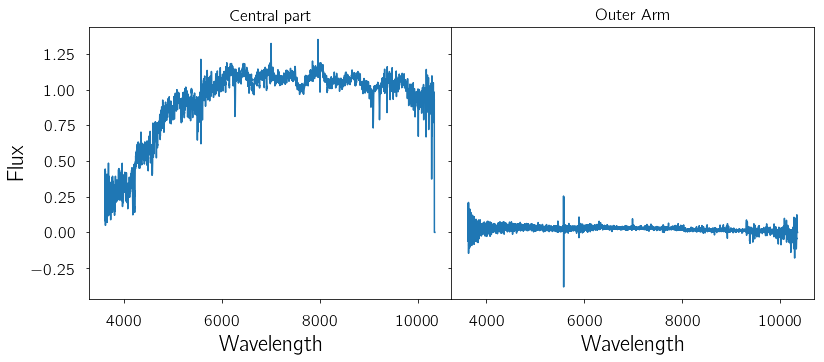

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,6), sharey = True)

ax1.plot(drp_logcube['WAVE'].data, drp_logcube['FLUX'].data[:,37,37])
ax1.set_xlabel('Wavelength')
ax1.set_ylabel('Flux')
ax1.set_title('Central part')
ax2.plot(drp_logcube['WAVE'].data, drp_logcube['FLUX'].data[:,17,19])
ax2.set_xlabel('Wavelength')
ax2.set_title('Outer Arm')
plt.gcf().subplots_adjust(wspace=0, hspace = 0, top = 0.83, bottom = 0.2)
plt.show()

<h3>2. Multiple Aperture Views of the Galaxy </h3>
<br>
The easiest "number" per spaxel that we can look at for comparison is the total flux, i.e, the area under the curves seen above. As we can already probably guess from the plots above, the outer parts of the galaxy contain orders of magnitude less flux than the centre. A simple numerical integration (trapezoidal sum here) can be used as a proxy for flux:

In [7]:
def tsum(xin, yin):
    tsum = np.sum(np.abs((xin[1:]-xin[:-1]))*(yin[1:]+yin[:-1])/2. )
    return tsum

We have defined a function to get the trapezoidal sum. We can now evaluate this for every point in the data cube:

In [8]:
#Dimensions of the datacube
NL, NY, NX = drp_logcube['FLUX'].data.shape
flux = np.array([[tsum(drp_logcube['WAVE'].data, drp_logcube['FLUX'].data[:,i,j]) 
          for j in range(NY)] for i in range(NX)])

Before we go ahead and plot this, let's produce a schematic diagram of the spaxel space.
<br>
<br>
We want to look at the regions of the galaxy contained within apertures of 3", 10", 30", etc. A unit in spaxel space is 0.5": thus 3 spaxel units correspond to 1.5" radius or a 3" diameter. Thus we want "circles" around the centre at these variable radii. Here's a way to generate the radii.

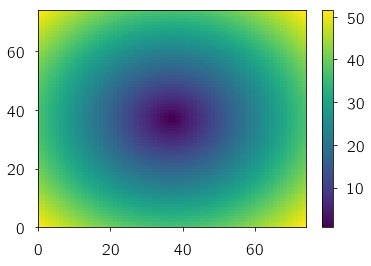

In [9]:
x_ax = np.arange(0, NX) + 0.5 - (NX/2.0)
y = np.outer((np.arange(0, NX) + 0.5) - (NX/2.0), np.ones(NX))
x = np.transpose(y)
s = np.sqrt((x*x+y*y))
plt.pcolormesh(s)
plt.colorbar()
plt.show()

We can now use "s" as our contours within which we pick the spaxels. We're ready to plot the fluxes per spaxel! For starters let's look at 3", 7",..,40" apertures:

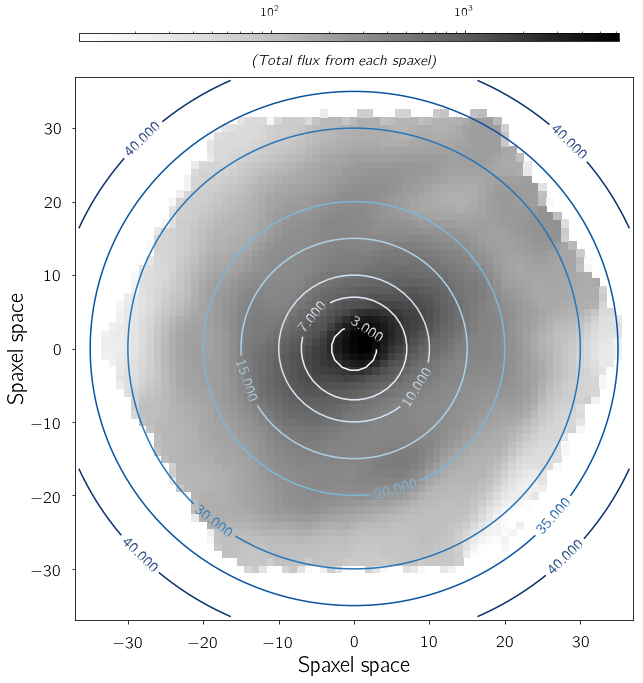

In [10]:
#A handful of spaxels have little to no signal: removing those!
number = np.ma.array(flux, mask = flux <= 10)


fig, ax = plt.subplots(1, 1, figsize = (10,10))
cs1 = ax.pcolormesh(x_ax,x_ax,number,norm = colors.LogNorm(), cmap = plt.cm.Greys)
l = [3.0, 7.0, 10.0, 15.0, 20.0, 30.0, 35.0, 40.0]
cs2 = ax.contour(x_ax,x_ax,s, levels = l, cmap = plt.cm.Blues)
plt.clabel(cs2, fontsize = 15)
plt.xlim(-37,37)
plt.ylim(-37,37)
plt.xlabel('Spaxel space')
plt.ylabel('Spaxel space')
cbar_ax = fig.add_axes([0.13, 0.93, 0.75, 0.01])
cb = fig.colorbar(cs1,orientation = 'horizontal', cax=cbar_ax)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.tick_params(labelsize=13)
fig.text(0.5, 0.9, r'\textit{(Total flux from each spaxel)}', 
         ha='center', va='center', fontsize = 15)
#plt.savefig('images/gal_aperture.png')
plt.show()

<h3> 3. The 3" View at Multiple Redshifts </h3>
<br>
An alternate way of looking at this would be: what is the 3" view (i.e., what the SDSS fiber would see) at multiple redshifts? We can easily flip what we have done above as follows:

In [11]:
#Defining the "radius" at new redshifts; Quick reminder that this particular galaxy is at z_obs of 0.0392;
z_obs = 0.0392

#Using astropy to get the "comoving distance" at relevant redshifts!

def rad(z_new):
    r = (3*(1+0.0392)*cosmo.comoving_distance(z_new)
        )/((1+z_new)*cosmo.comoving_distance(z_obs))
    return r

#Redshifts we are interested in:
radii = np.round(rad(np.array([z_obs,0.06,0.1,0.14, 0.5])),decimals = 2)
radii

<Quantity [ 3.  ,  4.48,  7.13,  9.55, 23.69]>

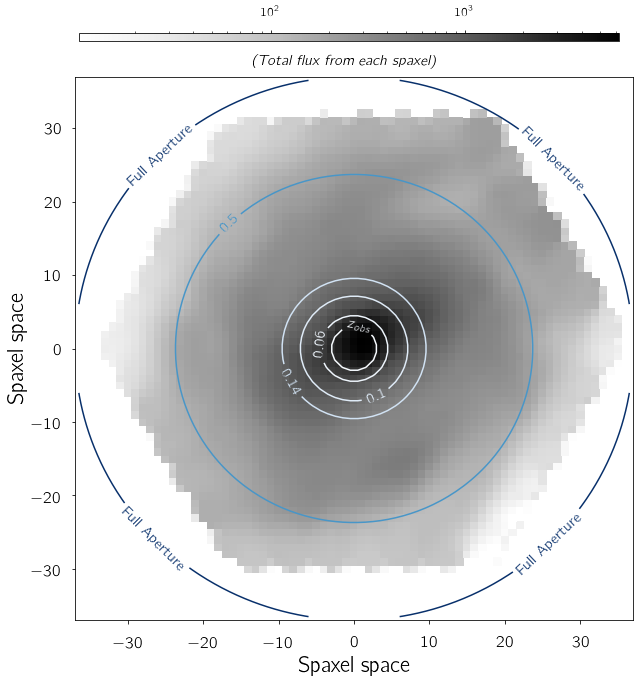

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (10,10))
cs1 = ax.pcolormesh(x_ax,x_ax,number,norm = colors.LogNorm(), cmap = plt.cm.Greys)
l = np.append(radii,37)
cs2 = ax.contour(x_ax,x_ax,s, levels = l, cmap = plt.cm.Blues)
fmt = {}
strs = [r'$z_{obs}$', '0.06','0.1','0.14','0.5','Full Aperture']
for l,t in zip(cs2.levels, strs ):
    fmt[l] = t
plt.clabel(cs2, fontsize = 15, fmt = fmt)
plt.xlim(-37,37)
plt.ylim(-37,37)
plt.xlabel('Spaxel space')
plt.ylabel('Spaxel space')
cbar_ax = fig.add_axes([0.13, 0.93, 0.75, 0.01])
cb = fig.colorbar(cs1,orientation = 'horizontal', cax=cbar_ax)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.tick_params(labelsize=13)
fig.text(0.5, 0.9, r'\textit{(Total flux from each spaxel)}', 
         ha='center', va='center', fontsize = 15)
plt.savefig('images/gal_aperture_redshifts.png')
plt.show()

<h3> 4. ${\rm H}\delta_{A}$ and ${\rm D}_{\rm n}4000$ measurements: Constraining Galaxy Mass</h3>
<br>
The two key ingredients that go into estimating stellar mass in galaxies, as per the <a href = "https://arxiv.org/abs/astro-ph/0204055"> MPA-JHU method </a> are the  ${\rm H}\delta_{A}$ and ${\rm D}_{\rm n}4000$ indicators: the former is an absorption line index, i.e. correlates with how deep the dip is with respect to the continuum and the latter in a break in the continuum of the spectrum quantified by the relative ratio of the fluxes.
<br>

Simplistically put, each point in the (${\rm D}_{\rm n}4000$, ${\rm H}\delta_{A}$) space corresponds to a mass-to-light ratio from which the galaxy mass can be inferred.

<br>
What I have done above for a single galaxy is now going to be reproduced for all the MaNGA datacubes released so far (~6400 of them!). I examine the spaxels falling within each of these multiple apertures and estimate the indicators, ${\rm H}\delta_{A}$ and ${\rm D}_{\rm n}4000$. The script <i>aperture_spec.py</i> was written for this. I briefly show how this works for MaNGA galaxy 9890-12702.

In [13]:
from aperture_spec import spec_measurements, aperture_measurements

#Initializing the aperture measurement instance on the datacube and observed redshift
a = aperture_measurements('../fits_files/manga-9890-12702-LOGCUBE.fits',z_obs)

Suppose we want the ${\rm H}\delta_{A}$ and ${\rm D}_{\rm n}4000$ measurements within 3" apertures at redshifts:

In [36]:
z_range = [0.04,0.06,0.08,0.1,0.14,0.2, 0.5]
hda =  [a.get_spec_measure(3,z_new,'hdelta') for z_new in z_range]
d4000 =  [a.get_spec_measure(3,z_new,'dn4000') for z_new in z_range]

We can get a trajectory for how offset they're going to be in the (${\rm D}_{\rm n}4000$, ${\rm H}\delta_{A}$) plane: (blue to yellow in order of increasing redshift, i.e., greater part of the galaxy falling withing the 3'' aperture:

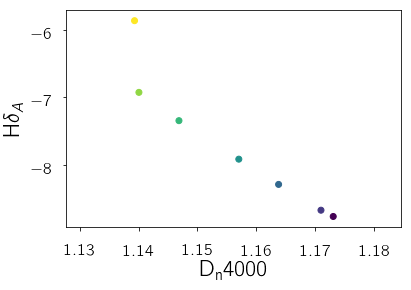

In [43]:
plt.scatter(d4000,hda, c = np.arange(len(z_range)), cmap = plt.cm.viridis)
plt.xlabel(r'${\rm D}_{\rm n}4000$')
plt.ylabel(r'${\rm H}\delta_{A}$')
plt.show()

The trajectory of a galaxy in this plane is super informative of the effect of aperture size. Going from the redshift the galaxy is at to the full aperture measurements give us a way to posisbly calibrate the aperture effects!

<br>

The following is a plot that shows the trajectories in this plane for all the 6400 galaxies for the 3 carefully chosen redshift bins: z = 0.02, 0.06 and 0.14 (the survey limit is 0.14)

<br>
<br>
<figure>
    <center>
        <img src="images/quivers.pdf"
			 alt="offset"
			 />
    </center>
</figure>

Finally, we are now poised to investigate the effect of aperture size on galaxy mass. We can map where the galaxy falls on the (${\rm D}_{\rm n}4000$, ${\rm H}\delta_{A}$) plane to a mass-to-light (M/L) ratio using the <a href = "https://arxiv.org/abs/astro-ph/0204055"> MPA-JHU </a> prescription. Reproducing this phase space mapping, I have produced the following figure describing the mean offsets and mean dispersions of the M/L ratios of the galaxies falling within each of these bins as a function of the (${\rm D}_{\rm n}4000$, ${\rm H}\delta_{A}$) plane:

<br>
<br>
<figure>
    <center>
        <img src="images/ml_offset_plot.pdf"
			 alt="m/l:offset"
			 />
    </center>
</figure>

<br>
